In [ ]:
!pip install gensim

In [1]:
import gensim

sentence="Jane is going to the cinema to watch a new comedy"
df= gensim.utils.simple_preprocess(sentence)



model = gensim.models.Word2Vec(
    window=10,
    min_count=2

)


model.build_vocab( df  )
model.train(df , total_examples=model.corpus_count, epochs=model.epochs )


(15, 190)

In [2]:
import numpy as np


# simulate input embeddings
X=np.random.rand(11,32 ) # 11 elements, each is a 16-dimensional vector

# initialize weight matrices for queries, keys, and values
W_Q=np.random.rand(32 ,32 ) # dimension chosen for example purposes
W_K=np.random.rand(32 ,32 )
W_V=np.random.rand(32 ,32 )

# compute queries, keys and values
Q=np.dot(X, W_Q)
K=np.dot(X, W_K)
V=np.dot(X, W_V)

print(f'Q: {Q.shape}')
print(f'K: {K.shape}')
print(f'V: {V.shape}')

Q: (11, 32)
K: (11, 32)
V: (11, 32)


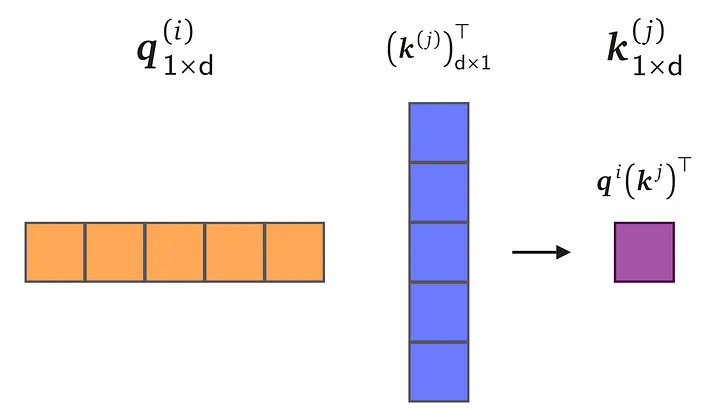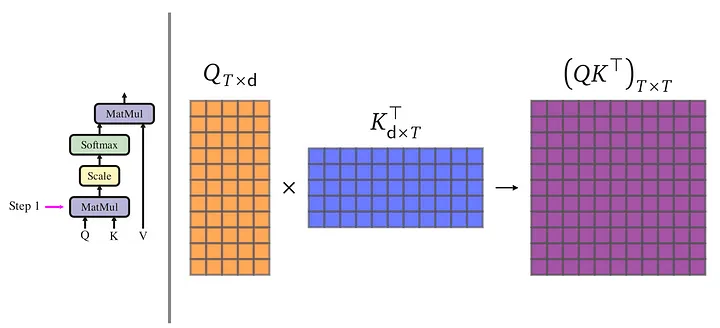

In [3]:
import numpy as np

compat = np.matmul(Q, K.T)
print(compat.shape)

(11, 11)


In [15]:
from google.colab import files
uploaded = files.upload()

Saving 1_sO9MASvrrrKCvdbtjwdyqg.webp to 1_sO9MASvrrrKCvdbtjwdyqg (1).webp


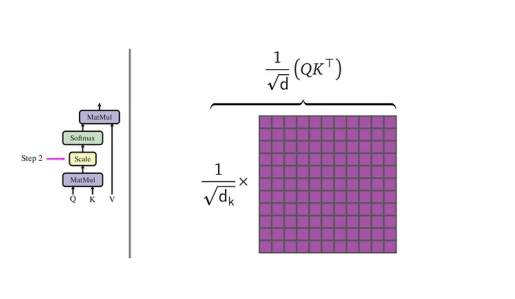

In [16]:
import io
import matplotlib.pyplot as plt
from PIL import Image

# Access the uploaded image
uploaded_image = list(uploaded.values())[0]

# Load the image from the uploaded file
image = Image.open(io.BytesIO(uploaded_image))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Hide axes
plt.show()

In [6]:
# Get the Scaled Dot Product
d_k=K.shape[-1]
scaled_dot_product =compat/(np.sqrt(d_k))

In [17]:
from google.colab import files
uploaded = files.upload()

Saving 1_4BX3vPwjwCbE3VNYwxOnqg.webp to 1_4BX3vPwjwCbE3VNYwxOnqg (1).webp


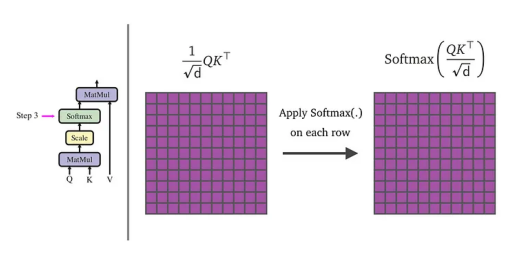

In [18]:
import io
import matplotlib.pyplot as plt
from PIL import Image

# Access the uploaded image
uploaded_image = list(uploaded.values())[0]

# Load the image from the uploaded file
image = Image.open(io.BytesIO(uploaded_image))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Hide axes
plt.show()

In [7]:
def softmax(z):
    exp_scores=np.exp(z) # this is e^z where e is a math constant
    probabilities=exp_scores/np.sum(exp_scores)
    return probabilities


# Apply Softmax to the Scaled Dot Product
attention_weights=softmax(scaled_dot_product)
print(f"\nSoftmax probabilities:{attention_weights}")


Softmax probabilities:[[2.38104991e-176 2.57369691e-160 2.14403450e-147 2.09713736e-124
  1.94904783e-143 4.06822412e-114 9.05368074e-141 4.05550426e-146
  3.92749924e-149 1.77904783e-140 1.22125815e-133]
 [1.87085791e-159 9.73451316e-140 6.48475326e-124 8.15813465e-096
  3.51353475e-119 1.64719855e-083 8.29094156e-116 2.66572495e-122
  2.84142622e-126 1.64909744e-115 1.72233945e-107]
 [1.66990153e-145 2.54657877e-123 2.80550078e-105 1.08165440e-073
  6.99479775e-100 2.35837118e-059 2.69449592e-096 1.15965765e-103
  5.53429907e-108 1.10721034e-095 1.65693457e-086]
 [1.43366077e-119 4.95489944e-092 4.41387325e-070 6.02920835e-031
  2.24352396e-063 1.63287299e-013 7.29535868e-059 6.74662327e-068
  3.14716446e-073 3.03855647e-058 5.36896048e-047]
 [7.03795296e-141 7.45732270e-118 3.36454851e-099 5.44284009e-066
  1.77557566e-093 3.32803489e-051 1.36583510e-089 2.41687060e-097
  7.46032010e-102 3.47096905e-089 1.48157710e-079]
 [2.73819681e-112 1.08157540e-083 2.72164169e-060 3.60869448e-

In [8]:
print(attention_weights.shape)

(11, 11)


In [19]:
from google.colab import files
uploaded = files.upload()

Saving 1_OJnrjujDBIDzhPXLlurP9Q.webp to 1_OJnrjujDBIDzhPXLlurP9Q (1).webp


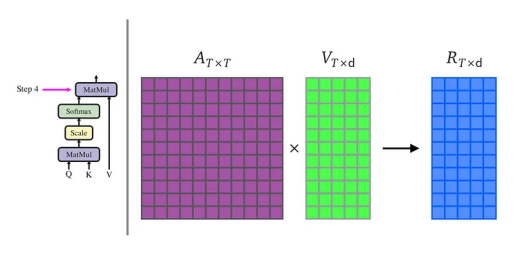

In [20]:
import io
import matplotlib.pyplot as plt
from PIL import Image

# Access the uploaded image
uploaded_image = list(uploaded.values())[0]

# Load the image from the uploaded file
image = Image.open(io.BytesIO(uploaded_image))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Hide axes
plt.show()

In [9]:
results = np.matmul(attention_weights, V)

print(results.shape)

(11, 32)


In [10]:
print(f"\nOutput:{results}")


Output:[[3.81674490e-113 5.28628030e-113 4.12268928e-113 3.96049538e-113
  4.13145517e-113 4.55134689e-113 4.52056021e-113 3.52763491e-113
  4.13885764e-113 4.54698333e-113 3.59306456e-113 4.66313403e-113
  3.92486614e-113 3.98129982e-113 4.85068153e-113 3.68468113e-113
  4.30122917e-113 5.02057806e-113 3.49776531e-113 3.43709801e-113
  4.27642691e-113 3.07813265e-113 4.46850976e-113 4.42687851e-113
  4.06751948e-113 3.87702117e-113 4.00872636e-113 4.37957555e-113
  4.76329307e-113 3.11549480e-113 4.71066496e-113 3.82558763e-113]
 [1.54537618e-082 2.14038189e-082 1.66925115e-082 1.60357986e-082
  1.67280041e-082 1.84281194e-082 1.83034661e-082 1.42831735e-082
  1.67579762e-082 1.84104517e-082 1.45480941e-082 1.88807386e-082
  1.58915380e-082 1.61200344e-082 1.96401067e-082 1.49190439e-082
  1.74154084e-082 2.03280071e-082 1.41622334e-082 1.39165953e-082
  1.73149856e-082 1.24631669e-082 1.80927171e-082 1.79241547e-082
  1.64691324e-082 1.56978167e-082 1.62310828e-082 1.77326280e-082
 